In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

features_df = pd.read_parquet("../data/changeset_data/osm_labelled_changeset_features_with_user_info.parquet")
features_df = features_df.sample(frac=1, random_state=42).reset_index(drop=True)

if features_df.columns.__contains__('geometry'):
    features_df.drop('geometry', axis=1, inplace=True)

if features_df.columns.__contains__('changeset_id'):
    features_df.drop('changeset_id', axis=1, inplace=True)

if features_df.columns.__contains__('created_at'):
    features_df.drop('created_at', axis=1, inplace=True)

if features_df.columns.__contains__('user'):
    features_df.drop('user', axis=1, inplace=True)
    
if features_df.columns.__contains__('comment'):
    features_df.drop('comment', axis=1, inplace=True)

if features_df.columns.__contains__('uid'):
    features_df.drop('uid', axis=1, inplace=True)

if features_df.columns.__contains__('changes_count'):
    features_df.drop('changes_count', axis=1, inplace=True)

features_df.columns = features_df.columns.str.replace(' ', '_', regex=True)

X = features_df.drop('label', axis=1).copy()
y = features_df['label'].copy()

X['closed_at'] = pd.to_datetime(X['closed_at']).astype(int) / 10**9
X['account_created'] = pd.to_datetime(X['account_created']).astype(int) / 10**9

X_encoded = pd.get_dummies(X, columns=['created_by'])

assert X_encoded.dtypes.__contains__('object') == False
X_encoded.head()

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42, stratify=y)


C:\Users\saise\AppData\Local\Temp\ipykernel_29840\1379433527.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


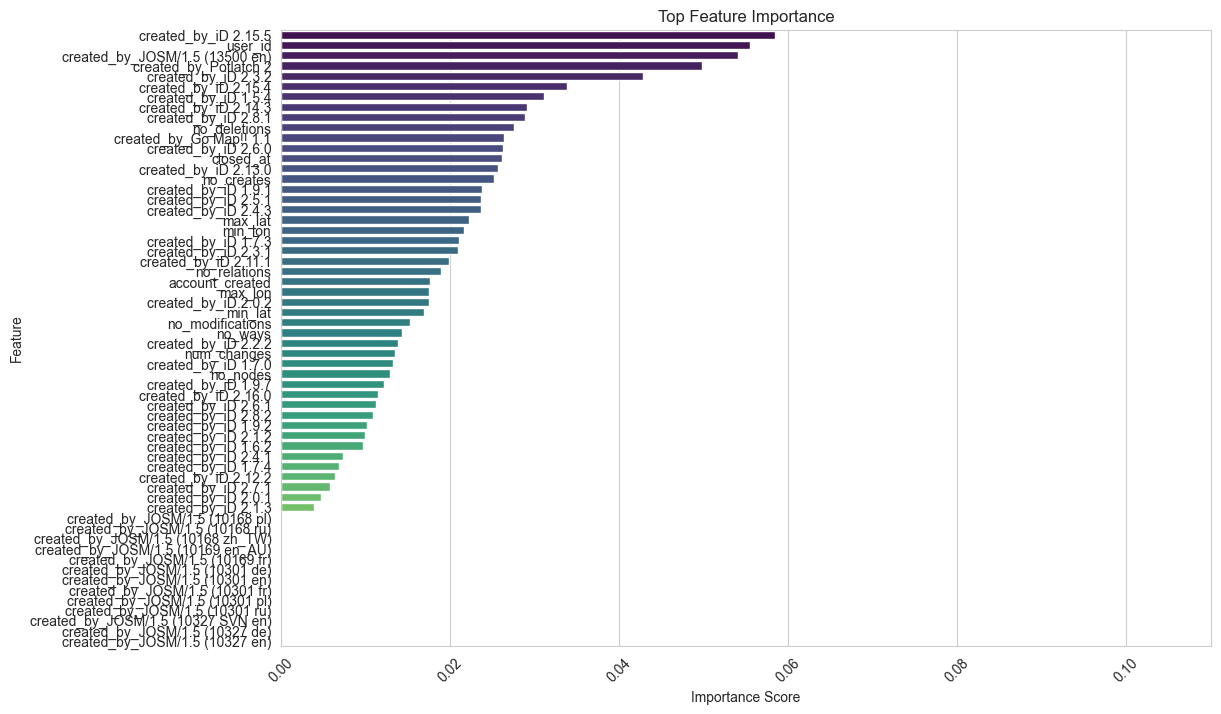

                                 Feature  Importance
1401                created_by_iD 2.15.5    0.058380
1                                user_id    0.055418
331       created_by_JOSM/1.5 (13500 en)    0.054029
1208               created_by_Potlatch 2    0.049820
1409                 created_by_iD 2.3.2    0.042842
1400                created_by_iD 2.15.4    0.033864
1352                 created_by_iD 1.5.4    0.031046
1395                created_by_iD 2.14.3    0.029120
1421                 created_by_iD 2.8.1    0.028889
12                          no_deletions    0.027564
21               created_by_Go Map!! 1.1    0.026408
1416                 created_by_iD 2.6.0    0.026311
0                              closed_at    0.026190
1391                created_by_iD 2.13.0    0.025710
10                            no_creates    0.025147
1370                 created_by_iD 1.9.1    0.023797
1415                 created_by_iD 2.5.1    0.023646
1413                 created_by_iD 2.4.3    0.

In [4]:
import pickle  # or use joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model from the .pkl file
model_filename = '../saved_parameters/changeset_model/final_xgboost_model_tuned.pkl'  # Change this to your model's filename
with open(model_filename, 'rb') as file:
    final_model = pickle.load(file)

# Extract feature importances from the trained model
feature_importances = final_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns  # Assuming X_train is your DataFrame with feature names
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Limit the number of features to display (e.g., top 20)
top_n = 60  # Change this to your desired number
importance_df = importance_df.head(top_n)

# Visualize feature importances
plt.figure(figsize=(12, 8))  # Increased figure size for better readability
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.xlim(0, 0.11)  # Set x-axis limit to a little above the max importance
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Print the feature importance DataFrame
print(importance_df)
